# Import

In [1]:
import os
import sys

import json
import math
import numpy as np
import matplotlib.pyplot as plt

import pytransform3d
from pytransform3d.urdf import UrdfTransformManager
from pytransform3d.plot_utils import make_3d_axis
from urdf_parser_py.urdf import URDF

# Helper Functions

In [2]:
%matplotlib widget

def load_json(filename: str):
    # Construct the absolute path by joining the current directory and relative path
    absolute_path = os.path.join(os.getcwd(), '..', filename)
    # Load the JSON data
    with open(absolute_path, 'r') as file:
        json_data = json.load(file)    
    return json_data

def xml_to_str(robot):
    # To XML string with filtering
    temp_str = robot.to_xml_string()
    words = temp_str.split()
    words[5] = '>'
    urdf_str = ' '.join(words)
    return urdf_str

# Intialization

In [3]:
# Load Configs
cam_mtxs = load_json('camera_mtx.json')
gaze_ctrs = load_json('calib_params.json')
urdf_path = os.path.join(os.getcwd(),"..","urdf","chest_grace.urdf")
robot = URDF.from_xml_file(urdf_path)

# URDF

# URDF Parameters Edit

In [28]:
# URDF Variable Assignment
for joint in robot.joints:
    if joint.name == 'torso':
        joint.origin.position[0] = -0.12234 + 0  # Offset
        joint.origin.position[1] = -0.0325 + 0
        joint.origin.position[2] = 0.05692 + 0
    elif joint.name == 'neck_pitch':
        joint.origin.rotation[0] = 0 + 0
    elif joint.name == 'head_pitch':
        joint.origin.position[2] = 0.13172 + 0
        joint.origin.rotation[0] = 0 + 0
        joint.origin.rotation[2] = 0 + 0
    elif joint.name == 'eyes_pitch':
        joint.origin.position[0] = 0.08492 + 0
        joint.origin.position[2] = 0.05186 + 0
        joint.origin.rotation[0] = 0 + 0
        joint.origin.rotation[2] = 0 + 0
    elif joint.name == 'lefteye_yaw':
        joint.origin.position[1] = 0.02895 + 0
    elif joint.name == 'righteye_yaw':
        joint.origin.position[1] = -0.02895 + 0
    elif joint.name == 'lefteye_cam':
        joint.origin.position[0] = 0.015 + 0
        joint.origin.rotation[0] = 0 + 0
        joint.origin.rotation[1] = 0 + 0
        joint.origin.rotation[2] = 0 + math.radians(60)  # Orientation Offset: Right Hand Rule
    elif joint.name == 'righteye_cam':
        joint.origin.position[0] = 0.015 + 0
        joint.origin.rotation[0] = 0 + 0
        joint.origin.rotation[1] = 0 + 0
        joint.origin.rotation[2] = 0 

# XML to String
urdf_str = xml_to_str(robot)

## Visualize URDF

In [29]:
tm = UrdfTransformManager()
joints_list = ["world","torso","realsense","neck","neck_py","head","eyes","lefteye","righteye","leftcamera","rightcamera"]

In [30]:
tm.load_urdf(urdf_str)

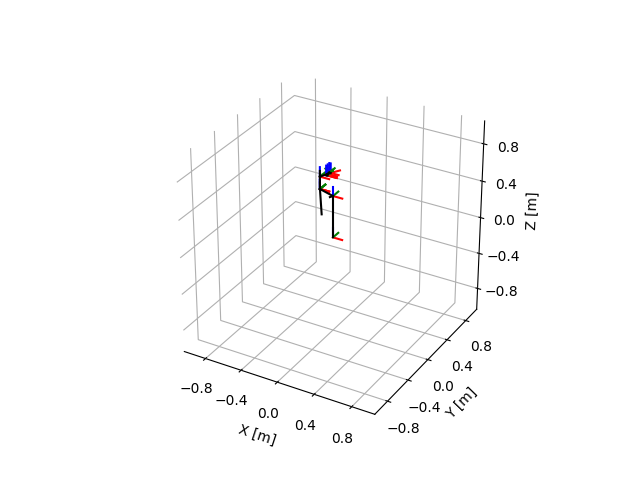

In [31]:
# Visualize
plt.figure()
ax = make_3d_axis(1, 111, unit="m")
ax = tm.plot_frames_in("robot", whitelist=joints_list,
                       s=0.1, show_name=False, ax=ax)
ax = tm.plot_connections_in("robot", ax=ax)
plt.show()

## Setting the Joints

In [32]:
# Motor Cmd Value

cmd_lnp = math.radians(10)
cmd_lnt = math.radians(10)
cmd_unt = math.radians(10)
cmd_et = math.radians(10)
cmd_lep = math.radians(5)
cmd_rep = math.radians(5)

In [33]:
# Transforms

neck_pitch = cmd_lnt*0.5 + 0
neck_yaw = cmd_lnp*0.5 + 0
head_pitch = cmd_unt*0.5 + 0
eyes_pitch = cmd_et*0.3 + 0
lefteye_yaw = cmd_lep*1.6 + 0
righteye_yaw = cmd_rep*1.7 + 0

In [34]:
# Setting the Joints

tm.set_joint('neck_pitch', neck_pitch)
tm.set_joint('neck_yaw', neck_yaw)
tm.set_joint('head_pitch', head_pitch)
tm.set_joint('eyes_pitch', eyes_pitch)
tm.set_joint('lefteye_yaw', lefteye_yaw)
tm.set_joint('righteye_yaw', righteye_yaw)

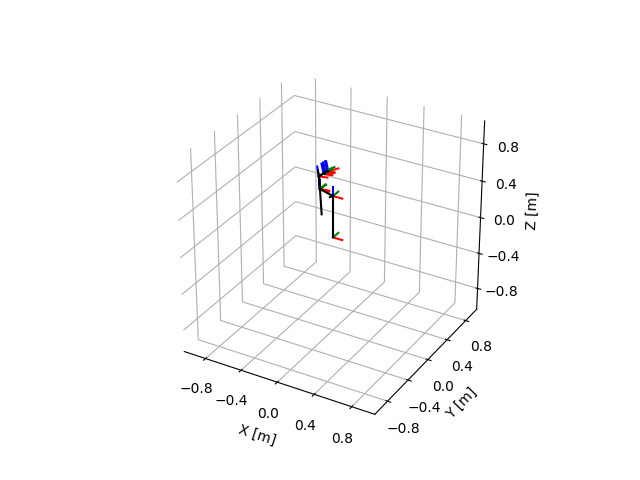

In [35]:
# Visualize
plt.figure()
ax = make_3d_axis(1, 111, unit="m")
ax = tm.plot_frames_in("robot", whitelist=joints_list,
                       s=0.1, show_name=False, ax=ax)
ax = tm.plot_connections_in("robot", ax=ax)
plt.show()